## 1. Data Exploration:
    a. Load the dataset and perform exploratory data analysis (EDA).
    b. Examine the features, their types, and summary statistics.
    c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
    Analyze any patterns or correlations observed in the data.
## 2. Data Preprocessing:
    a. Handle missing values (e.g., imputation).
    b. Encode categorical variables.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import chi2,f_classif
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Titanic_train.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
df.fillna({'Age':df['Age'].mean(),'Cabin':df['Cabin'].mode,'Embarked':df['Embarked'].mode},inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
target=df[['Survived']]
target

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [8]:
target.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [9]:
features=df[['Pclass','Name','Sex', 'Age', 'SibSp', 'Parch', 'Ticket','Fare','Embarked']]
features

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [10]:
cat_col=features.select_dtypes(['object','category']).columns
cat_col

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [11]:
cat=features[cat_col]
cat = cat.astype(str)
cat.head()

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S


In [12]:
Ord=OrdinalEncoder()
df2=pd.DataFrame(Ord.fit_transform(cat),columns=cat.columns)
df2.head()

,Name,Sex,Ticket,Embarked
0,108.0,1.0,523.0,3.0
1,190.0,0.0,596.0,1.0
2,353.0,0.0,669.0,3.0
3,272.0,0.0,49.0,3.0
4,15.0,1.0,472.0,3.0


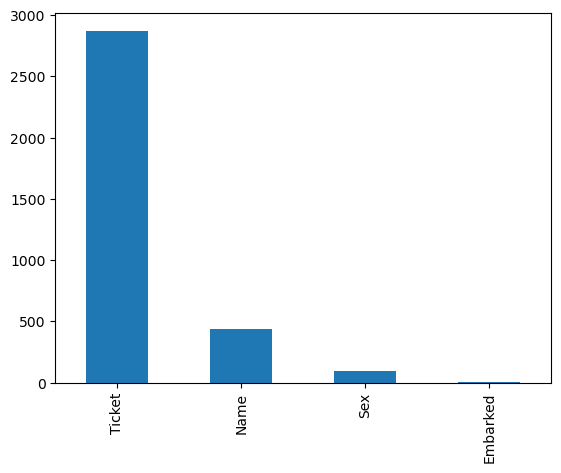

In [13]:
chi=chi2(df2,target)
pd.Series(chi[0],index=df2.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [14]:
df2.drop(columns='Embarked',inplace=True)
df2.head()

,Name,Sex,Ticket
0,108.0,1.0,523.0
1,190.0,0.0,596.0
2,353.0,0.0,669.0
3,272.0,0.0,49.0
4,15.0,1.0,472.0


In [15]:
num_col=features.select_dtypes(['int','float']).columns
num_col

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [16]:
num=df[num_col]
num.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


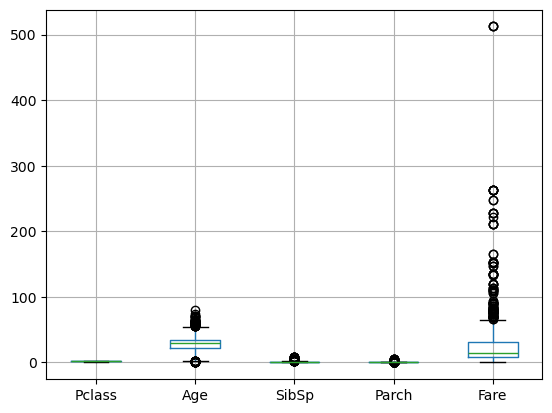

In [17]:
num.boxplot()
plt.show()

In [18]:
def outliercapping(num,col):
    q1=num[col].quantile(0.25)
    q3=num[col].quantile(0.75)
    IQR=q3-q1
    lower=q1 - 1.5*IQR
    upper=q3 + 1.5*IQR
    num[col]=num[col].apply(lambda x:upper if x > upper else lower if x < lower else x)
for col in num.select_dtypes(['int','float']).columns:
    outliercapping(num,col)

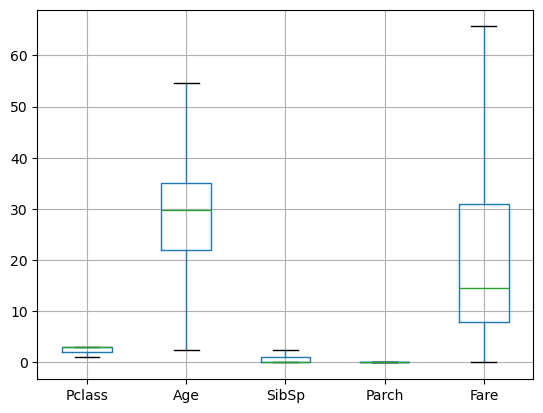

In [19]:
num.boxplot()
plt.show()

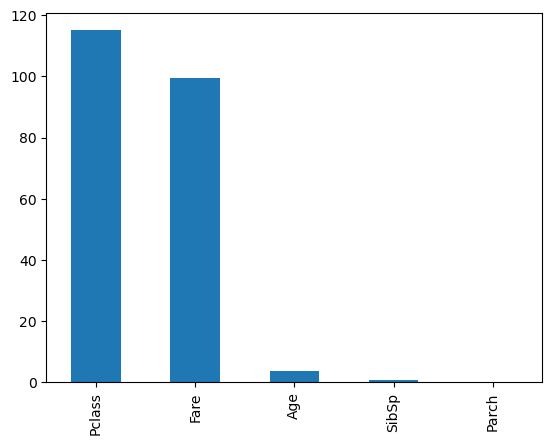

In [20]:
fcls=f_classif(num,target)
pd.Series(fcls[0],index=num.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [21]:
num.drop(columns=['SibSp'],inplace=True)
num.head()

,Pclass,Age,Parch,Fare
PassengerId,,,,
1,3,22.0,0.0,7.2500
2,1,38.0,0.0,65.6344
3,3,26.0,0.0,7.9250
4,1,35.0,0.0,53.1000
5,3,35.0,0.0,8.0500


In [22]:
std=StandardScaler()
num[['Age','Fare']]=std.fit_transform(num[['Age','Fare']])
num.head()

,Pclass,Age,Parch,Fare
PassengerId,,,,
1,3,-0.611917,0.0,-0.820552
2,1,0.715304,0.0,2.031623
3,3,-0.280111,0.0,-0.787578
4,1,0.466450,0.0,1.419297
5,3,0.466450,0.0,-0.781471


In [23]:
features_new=pd.concat([df2,num],axis=1)
features_new

,Name,Sex,Ticket,Pclass,Age,Parch,Fare
0,108.0,1.0,523.0,NaN,NaN,NaN,NaN
1,190.0,0.0,596.0,3.0,-0.611917,0.0,-0.820552
2,353.0,0.0,669.0,1.0,0.715304,0.0,2.031623
3,272.0,0.0,49.0,3.0,-0.280111,0.0,-0.787578
4,15.0,1.0,472.0,1.0,0.466450,0.0,1.419297
...,...,...,...,...,...,...,...
887,303.0,0.0,14.0,2.0,-0.197160,0.0,-0.539655
888,413.0,0.0,675.0,1.0,-0.860771,0.0,0.290823
889,81.0,1.0,8.0,3.0,0.026735,0.0,-0.029155
890,220.0,1.0,466.0,1.0,-0.280111,0.0,0.290823


In [62]:
features['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [24]:
features_new.isnull().sum()

Name      1
Sex       1
Ticket    1
Pclass    1
Age       1
Parch     1
Fare      1
dtype: int64

In [66]:
#features_new.drop(columns=['Name'],inplace=True)
features_new.head()

,Sex,Ticket,Pclass,Age,Parch,Fare
0,1.0,523.0,3.0,29.699118,0.0,32.204208
1,0.0,596.0,3.0,-0.611917,0.0,-0.820552
2,0.0,669.0,1.0,0.715304,0.0,2.031623
3,0.0,49.0,3.0,-0.280111,0.0,-0.787578
4,1.0,472.0,1.0,0.466450,0.0,1.419297


In [67]:
target.dtypes

Survived    int64
dtype: object

In [68]:
features_new.fillna({'Pclass':df['Pclass'].mode(),'Age':df['Age'].mean(),'Parch':df['Parch'].mode(),'Fare':df['Fare'].mean()},inplace=True)

In [69]:
features_new.isnull().sum()

Sex       0
Ticket    0
Pclass    0
Age       0
Parch     0
Fare      0
dtype: int64

In [70]:
features_new.dropna(inplace=True)

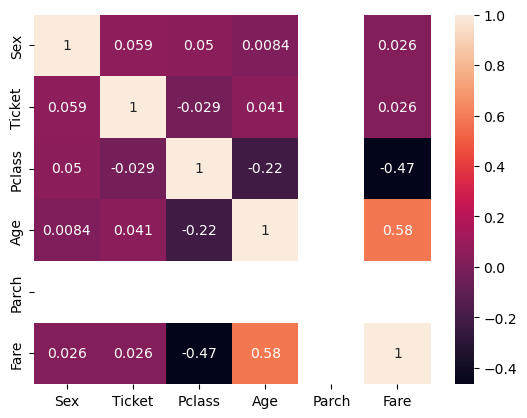

In [71]:
cor=features_new.corr()
sns.heatmap(cor,annot=True)
plt.show()

## 3. Model Building:
    a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
    b. Train the model using the training data.


In [72]:
x_train,x_test,y_train,y_test=train_test_split(features_new,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712, 1)
(179, 1)


In [73]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [74]:
y_pred=log.predict(x_test)
accuracy_score(y_test,y_pred)

0.7877094972067039

## 4. Model Evaluation:
    a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
    Visualize the ROC curve.


In [75]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("F1_score",f1_score(y_test,y_pred))

Accuracy: 0.7877094972067039
Precision: 0.7681159420289855
Recall 0.7066666666666667
F1_score 0.7361111111111112


In [34]:
sigmoid=log.predict_proba(x_test)[:,1]
sigmoid

array([0.74881603, 0.74201166, 0.15680816, 0.54655536, 0.23434791,
       0.13426933, 0.17716044, 0.70118362, 0.59313955, 0.6477617 ,
       0.80703152, 0.11941508, 0.24904123, 0.73510133, 0.61140441,
       0.25718404, 0.81746824, 0.15670338, 0.23839099, 0.1340724 ,
       0.15481433, 0.69001121, 0.24546325, 0.58977768, 0.15756409,
       0.13263536, 0.72561979, 0.2639252 , 0.16514092, 0.20602376,
       0.15189607, 0.80589997, 0.33000203, 0.18625917, 0.82901937,
       0.2029815 , 0.69865887, 0.69561359, 0.79798229, 0.22835718,
       0.71784465, 0.74804162, 0.26901066, 0.18063689, 0.1519238 ,
       0.80255209, 0.13248725, 0.74904103, 0.15982419, 0.71050338,
       0.24685034, 0.27183118, 0.10538958, 0.21642017, 0.12107214,
       0.11505973, 0.11356632, 0.23879982, 0.17055465, 0.13679982,
       0.15734175, 0.1778038 , 0.20745309, 0.18586944, 0.16869165,
       0.75892297, 0.20558937, 0.81848307, 0.81709963, 0.13623684,
       0.10696647, 0.14354384, 0.14641763, 0.57623455, 0.16108

In [35]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

np.float64(0.8094871794871795)

In [36]:
fpr,tpr,threshold=roc_curve(y_test,sigmoid)

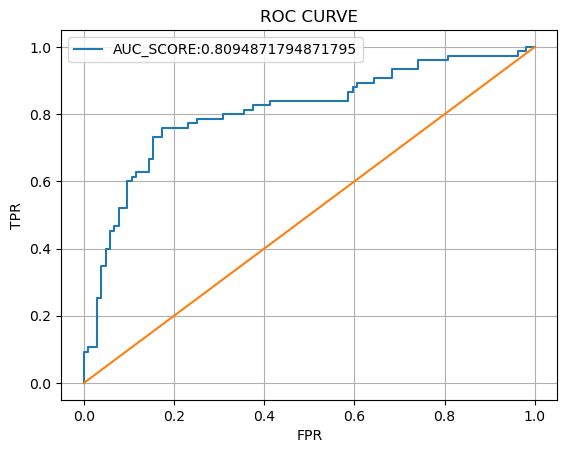

In [37]:
plt.plot(fpr,tpr,lw=1.5,label=f"AUC_SCORE:{auc_score}")
plt.plot([0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.legend()

## 5. Interpretation:
    a. Interpret the coefficients of the logistic regression model.
    b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [38]:
log.coef_

array([[-2.65986263e-04, -2.46502340e+00, -1.49635360e-03,
         3.25694786e-01,  9.29004707e-03,  0.00000000e+00,
         5.92487166e-02]])

In [39]:
log.intercept_

array([0.85300264])

In [40]:
### Testing data
test=pd.read_csv('Titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
test.drop(columns='Cabin',inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [43]:
test.fillna({'Age':test['Age'].mean(),'Fare':test['Fare'].mean()},inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [44]:
test.duplicated().sum()

np.int64(0)

In [45]:
cat_col=test.select_dtypes(['object','category']).columns
cat_col

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [46]:
cat=test[cat_col]
cat

,Name,Sex,Ticket,Embarked
0,"Kelly, Mr. James",male,330911,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,S
2,"Myles, Mr. Thomas Francis",male,240276,Q
3,"Wirz, Mr. Albert",male,315154,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,S
...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,S
416,"Ware, Mr. Frederick",male,359309,S


In [47]:
ord=OrdinalEncoder()
new_cat=pd.DataFrame(ord.fit_transform(cat),columns=cat.columns)
new_cat.head()

,Name,Sex,Ticket,Embarked
0,206.0,1.0,152.0,1.0
1,403.0,0.0,221.0,2.0
2,269.0,1.0,73.0,1.0
3,408.0,1.0,147.0,2.0
4,178.0,0.0,138.0,2.0


In [48]:
num_col=test.select_dtypes(['int','float']).columns
num_col

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [49]:
num=test[num_col]
num

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.50000,0,0,7.8292
1,893,3,47.00000,1,0,7.0000
2,894,2,62.00000,0,0,9.6875
3,895,3,27.00000,0,0,8.6625
4,896,3,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500
414,1306,1,39.00000,0,0,108.9000
415,1307,3,38.50000,0,0,7.2500
416,1308,3,30.27259,0,0,8.0500


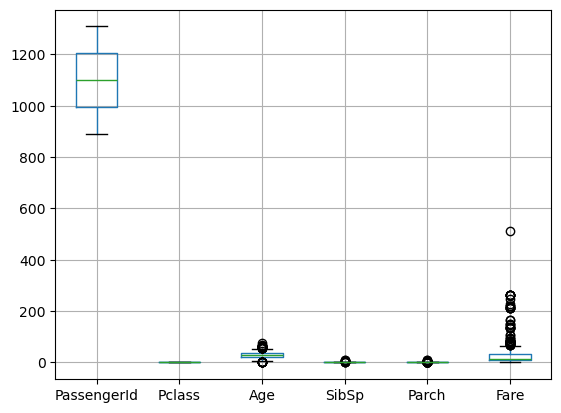

In [50]:
num.boxplot()
plt.show()

In [51]:
def outliercapping(num,col):
    q1=num[col].quantile(0.25)
    q3=num[col].quantile(0.75)
    IQR=q3-q1
    lower=q1 - 1.5*IQR
    upper=q3 + 1.5*IQR
    num[col]=num[col].apply(lambda x:upper if x > upper else lower if x < lower else x)
for col in num.select_dtypes(['int','float']).columns:
    outliercapping(num,col)

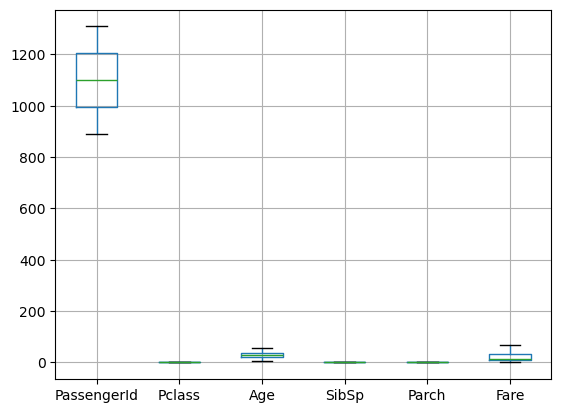

In [52]:
num.boxplot()
plt.show()

In [53]:
std=StandardScaler()
new_num=pd.DataFrame(std.fit_transform(num),columns=num.columns)
new_num.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.727912,0.873482,0.382366,-0.622272,0.0,-0.796470
1,-1.719625,0.873482,1.451281,0.949387,0.0,-0.835607
2,-1.711337,-0.315819,2.124697,-0.622272,0.0,-0.708760
3,-1.703050,0.873482,-0.258983,-0.622272,0.0,-0.757139
4,-1.694763,0.873482,-0.686549,0.949387,0.0,-0.586042


In [54]:
features_test=pd.concat([new_cat,new_num],axis=1)
features_test

,Name,Sex,Ticket,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,206.0,1.0,152.0,1.0,-1.727912,0.873482,0.382366,-0.622272,0.0,-0.796470
1,403.0,0.0,221.0,2.0,-1.719625,0.873482,1.451281,0.949387,0.0,-0.835607
2,269.0,1.0,73.0,1.0,-1.711337,-0.315819,2.124697,-0.622272,0.0,-0.708760
3,408.0,1.0,147.0,2.0,-1.703050,0.873482,-0.258983,-0.622272,0.0,-0.757139
4,178.0,0.0,138.0,2.0,-1.694763,0.873482,-0.686549,0.949387,0.0,-0.586042
...,...,...,...,...,...,...,...,...,...,...
413,353.0,1.0,267.0,2.0,1.694763,0.873482,0.020867,-0.622272,0.0,-0.786048
414,283.0,0.0,324.0,0.0,1.703050,-1.505120,0.767175,-0.622272,0.0,1.991912
415,332.0,1.0,346.0,2.0,1.711337,0.873482,0.724419,-0.622272,0.0,-0.823807
416,384.0,1.0,220.0,2.0,1.719625,0.873482,0.020867,-0.622272,0.0,-0.786048


In [ ]:
Interview Questions:
1. What is the difference between precision and recall?
                    
2. What is cross-validation, and why is it important in binary classification?


## 6. Deployment with Streamlit:
    In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 
    (optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
    Detailed deployment instructions are available in the Streamlit Documentation.
    https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app


In [76]:
import pickle

In [77]:
file='log.pkl'

In [78]:
pickle.dump(log,open(file,'wb'))